In [32]:
from cProfile import label

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.saving.saved_model.serialized_attributes import metrics

In [33]:
data = pd.read_csv('datasetRegression.csv')
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [34]:
data.shape

(300, 2)

In [35]:
X = data['x']
y = data['y']

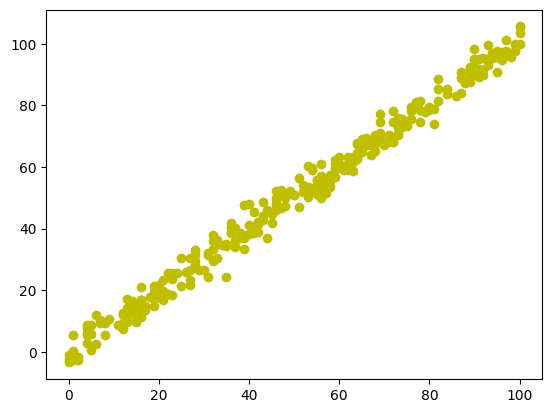

In [36]:
plt.scatter(X,y, c='y')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

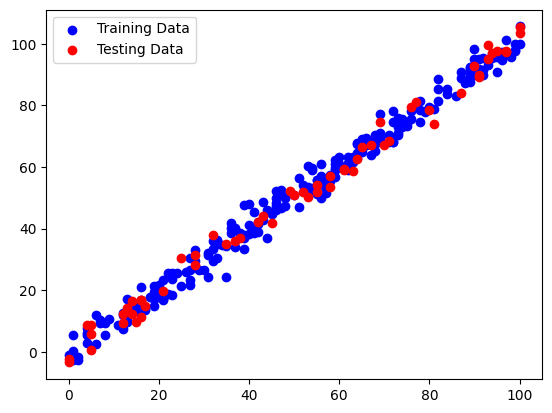

In [38]:
plt.scatter(X_train,y_train, c='b', label='Training Data')
plt.scatter(X_test,y_test, c='r', label='Testing Data')
plt.legend()
plt.show()

## Build the regression model

In [39]:
# create a sequential model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=(1,)), # Hidden layers
    tf.keras.layers.Dense(units=10),                   # Hidden layers
    tf.keras.layers.Dense(units=1)                    # Output layer
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.05),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# train the model
epochs = 10
history = model.fit(tf.expand_dims(X_train, axis=1) , y_train, epochs=epochs)

Epoch 1/10


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39.8548 - mae: 39.8548  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9966 - mae: 6.9966 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6760 - mae: 3.6760 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0049 - mae: 3.0049 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7245 - mae: 2.7245 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9918 - mae: 2.9918 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6025 - mae: 2.6025 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1252 - mae: 3.1252 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3756 - mae: 5.3756 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6000 - mae: 4.6000 


In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [41]:
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025F83069C60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


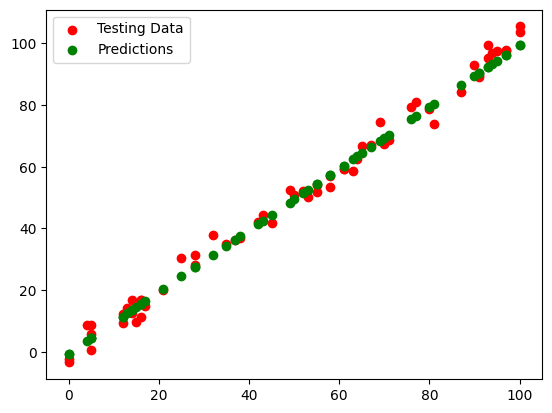

In [42]:
# plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='r', label='Testing Data')
plt.scatter(X_test, y_pred, c='g', label='Predictions')
plt.legend()
plt.show()

In [43]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6559 - mae: 2.6559 


[2.549487829208374, 2.549487829208374]

In [44]:
# Using MEA

mae = tf.metrics.mae(y_test, tf.squeeze(y_pred)) # squeeze to remove the extra dimension
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.549487829208374>

In [45]:
# Using MSE
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.89707088470459>

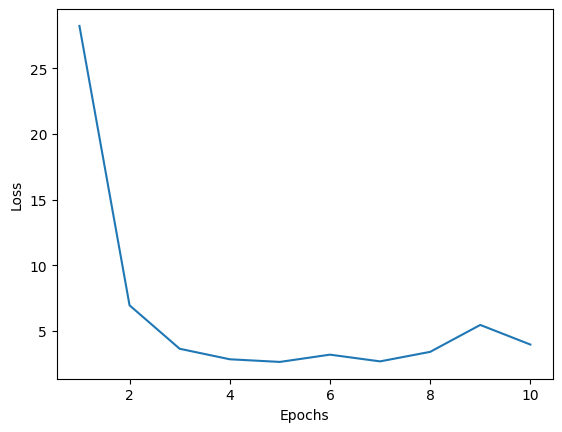

In [46]:
x_range = range(1, epochs+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [47]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights}\nBiases:\n {biases}")


Weights:
 [[ 0.05274754 -0.22441576  0.11850602 -0.0036579   0.00055276 -0.22229086
   0.00111672 -0.16517127  0.03487505 -0.02322499 -0.00192561 -0.08522663
  -0.03289517 -0.00120188 -0.02030306 -0.11168787 -0.00535512 -0.30403218
  -0.14085326  0.00454391 -0.00125293 -0.00071938  0.06422169 -0.08544131
   0.01685663  0.00152852  0.0029968  -0.00440914  0.24492899 -0.21146758
   0.26107875 -0.03327212 -0.00036043 -0.06014463  0.23847507 -0.0926532
   0.0208043  -0.05687311 -0.05409075 -0.00184076  0.05068545 -0.08059046
  -0.14719522  0.01648039  0.07581482 -0.00619701  0.00046236 -0.00641497
  -0.06083101  0.03909818 -0.01937619 -0.25174633 -0.01315845 -0.00135609
  -0.0152387  -0.1790652  -0.04696552 -0.07410184  0.01432763  0.11308993
   0.12327698  0.24278806  0.01099509  0.00705923]]
Biases:
 [-0.16043954  0.13446295 -0.24237804  0.12395836 -0.0540682   0.14409074
  0.03855553  0.15835474 -0.1994181  -0.20455067 -0.0401738   0.2772428
  0.02900217 -0.00360428 -0.30034643  0.2378